In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams['font.size'] = 12


#Modelo para la predicción de interrupciones de energía en circuitos de distribución reportados a la superintendencia de servicios públicos Colombia

**Giovanny Salinas Moreno**

**Mayo 2023**

**Resumen**

 La calidad del servicio de energía es un aspecto fundamental para el bienestar de la sociedad, ya que influye en la productividad de las empresas, el confort de los hogares y la seguridad ciudadana. Por eso es importante analizar detenidamente las interrupciones a nivel circuito que reportan las empresas de energía ante la superintendencia de servicios públicos, con el fin de conocer características significativas que nos permitan tomar decisiones para mejorar la calidad del servicio eléctrico. Con el presente trabajo se buscó conocer los rasgos característicos de un circuito eléctrico que presentó alguna interrupción en un determinado año y así pronosticar el tiempo de las interrupciones no programadas implementando técnicas de machine learning. Esto se realizará con los datos abiertos de las interrupciones programadas y no programadas reportadas a la superintendencia entre los años 2010 - 2022 (n=85387), se entrenaron diversos modelos utilizando técnicas de aprendizaje supervisado para pronosticar el tiempo de interrupción de los circuitos. Con los resultados obtenidos se espera identificar el mejor modelo que se ajuste a los datos, evaluar el tiempo de las interrupciones no programadas de un circuito con el fin de conocer si estas interrupciones han disminuido respecto al año anterior.

Se analizaron aquellos circuitos que presentan falla entre los años 2011 -2021 durante los 12 meses, se selecciono el circuito 10909301, el criterio fue por la demanda de energia, la longitud, atencion a un municipio (Grupo de calidad 3 urbano), cantidad de eventos presentados durante el mes y la cantidad de minutos acumulado.

Fuente de datos: http://sui.superservicios.gov.co/datos-abiertos/Energia/Energia-Formato-4-Informacion-de-Alimentadores

**DATOS**

FECHA: FECHA COMPLETA DE LA INTERRUPCION

INTER_NO_PROG_NO_EXCLU_INTER	INTER_NO_PROG_NO_EXCLU_MIN

In [ ]:
#CARGAMOS DATOS
import pandas as pd
df = pd.read_excel('https://docs.google.com/uc?id=1ho7ZSnux_vyPnUo4bL5AuabO0_4yTfPQ')
df

,FECHA,INTER_NO_PROG_NO_EXCLU_MIN
0,2011-01-01 02:36:00,212.6
1,2011-01-01 04:06:00,16.5
2,2011-01-01 05:03:00,142.1
3,2011-01-01 11:07:00,102.4
4,2011-01-02 14:07:00,209.8
...,...,...
5318,2021-12-26 03:43:00,205.8
5319,2021-12-27 02:09:00,153.0
5320,2021-12-27 21:46:00,37.4
5321,2021-12-28 09:03:00,198.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   FECHA                       5323 non-null   datetime64[ns]
 1   INTER_NO_PROG_NO_EXCLU_MIN  5323 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 83.3 KB


In [ ]:
df1= df.copy()
df1 = df1.set_index('FECHA')
df1


,INTER_NO_PROG_NO_EXCLU_MIN
FECHA,
2011-01-01 02:36:00,212.6
2011-01-01 04:06:00,16.5
2011-01-01 05:03:00,142.1
2011-01-01 11:07:00,102.4
2011-01-02 14:07:00,209.8
...,...
2021-12-26 03:43:00,205.8
2021-12-27 02:09:00,153.0
2021-12-27 21:46:00,37.4


In [ ]:
df1.index

DatetimeIndex(['2011-01-01 02:36:00', '2011-01-01 04:06:00',
               '2011-01-01 05:03:00', '2011-01-01 11:07:00',
               '2011-01-02 14:07:00', '2011-01-03 13:01:00',
               '2011-01-03 23:35:00', '2011-01-05 12:05:00',
               '2011-01-06 07:39:00', '2011-01-06 10:25:00',
               ...
               '2021-12-24 02:28:00', '2021-12-24 22:42:00',
               '2021-12-25 04:24:00', '2021-12-25 10:17:00',
               '2021-12-25 18:38:00', '2021-12-26 03:43:00',
               '2021-12-27 02:09:00', '2021-12-27 21:46:00',
               '2021-12-28 09:03:00', '2021-12-28 21:37:00'],
              dtype='datetime64[ns]', name='FECHA', length=5323, freq=None)

In [ ]:
#FRECUENCIA SEMANAL
datos3 = df1
datos3 = datos3.resample(rule='W').mean()
datos3.index.freq = 'W'
datos3

,INTER_NO_PROG_NO_EXCLU_MIN
FECHA,
2011-01-02,136.680000
2011-01-09,118.127273
2011-01-16,101.616667
2011-01-23,132.885714
2011-01-30,115.800000
...,...
2021-12-05,115.850000
2021-12-12,81.400000
2021-12-19,96.273333


In [ ]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 575 entries, 2011-01-02 to 2022-01-02
Freq: W-SUN
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INTER_NO_PROG_NO_EXCLU_MIN  575 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [ ]:
# Eliminar filas con valores nulos
datos3.dropna(inplace=True)
datos3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 575 entries, 2011-01-02 to 2022-01-02
Freq: W-SUN
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INTER_NO_PROG_NO_EXCLU_MIN  575 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


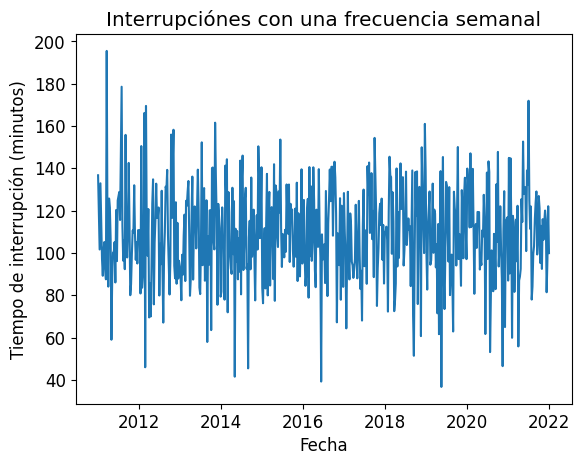

In [ ]:
plt.plot(datos3['INTER_NO_PROG_NO_EXCLU_MIN'])
plt.xlabel('Fecha')
plt.ylabel('Tiempo de interrupción (minutos)')
plt.title('Interrupciónes con una frecuencia semanal')
plt.show()

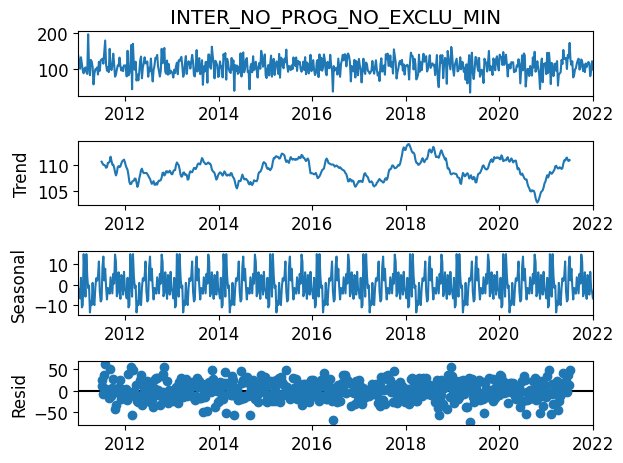

In [ ]:
#validamos la estacionalidad utilizando gráficos de descomposición
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie de tiempo
result = seasonal_decompose(datos3['INTER_NO_PROG_NO_EXCLU_MIN'], model='additive')

# Graficar la descomposición
result.plot()
plt.show()

El grafico de ruido de Fisher con residuos dispersos de manera uniforme alrededor de la línea nos indica una buena homogeneidad de la varianza

In [ ]:
# Prueba de Dickey-Fuller aumentada (ADF)
result = adfuller(datos3)
# Extraer los valores críticos y el estadístico de prueba
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Imprimir los resultados
print(f"Estadístico de prueba (ADF): {adf_statistic}")
print(f"Valor p: {p_value}")
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

Estadístico de prueba (ADF): -23.622032897507992
Valor p: 0.0
Valores críticos:
  1%: -3.4417938762914972
  5%: -2.866588428280353
  10%: -2.5694586650317475


El estadístico de prueba (ADF) es un valor negativo y significativamente menor que los valores críticos en todos los niveles de confianza. Los resultados indican que la serie de tiempo es estacionaria. No se observa evidencia de tendencias o patrones sistemáticos a lo largo del tiempo, lo que sugiere que la serie de tiempo de interrupciones de energía eléctrica no muestra comportamiento no estacionario.

Cuando se observa estacionalidad en los datos, significa que hay influencias estacionales que afectan el comportamiento de la serie de tiempo. Estas influencias pueden estar relacionadas con factores como el tiempo, el clima, festividades, eventos anuales u otros ciclos repetitivos.

In [ ]:
#Datos para entrenamiento y testeo para entrenar modelos ARIMA - MLProgressor - PROPHET

# Dividir los datos en entrenamiento y prueba
train= datos3[:555]
test= datos3[-20:]
test1=test
# Imprimir los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento:")
print(train)
print("\nConjunto de prueba:")
print(test)
train.shape, test.shape

Conjunto de entrenamiento:
            INTER_NO_PROG_NO_EXCLU_MIN
FECHA                                 
2011-01-02                  136.680000
2011-01-09                  118.127273
2011-01-16                  101.616667
2011-01-23                  132.885714
2011-01-30                  115.800000
...                                ...
2021-07-18                  111.371429
2021-07-25                  121.936364
2021-08-01                   77.940000
2021-08-08                   84.100000
2021-08-15                   99.618182

[555 rows x 1 columns]

Conjunto de prueba:
            INTER_NO_PROG_NO_EXCLU_MIN
FECHA                                 
2021-08-22                  103.227273
2021-08-29                  115.930769
2021-09-05                  123.800000
2021-09-12                  129.030769
2021-09-19                   99.250000
2021-09-26                  104.790000
2021-10-03                  126.877778
2021-10-10                  121.130769
2021-10-17                   95

((555, 1), (20, 1))

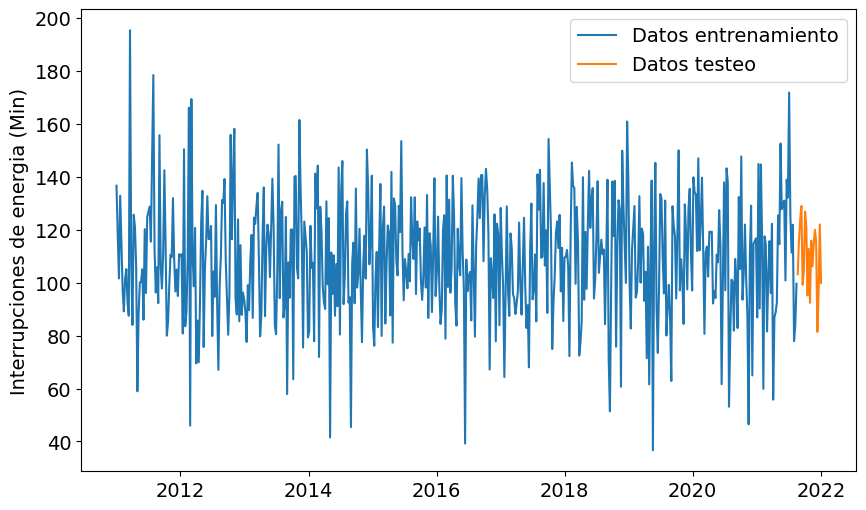

In [ ]:
plt.figure(figsize=(10, 6))
# Graficar los datos
plt.plot(train.index,train['INTER_NO_PROG_NO_EXCLU_MIN'],label = 'Datos entrenamiento')
plt.plot(test.index,test['INTER_NO_PROG_NO_EXCLU_MIN'],label = 'Datos testeo')
plt.ylabel('Interrupciones de energia (Min)')
plt.legend()
plt.show()

**ARIMA**

 Vamos ajustar automáticamente un modelo ARIMA (AutoRegressive Integrated Moving Average) a una serie de tiempo. Esta función es útil cuando se desea encontrar el mejor modelo ARIMA para una serie de tiempo sin tener que ajustar manualmente los parámetros del modelo.

La función auto_arima utiliza un enfoque de fuerza bruta para probar múltiples combinaciones de parámetros ARIMA y selecciona el modelo que tiene el menor criterio de información, como el criterio de información de Akaike (AIC) o el criterio de información bayesiano (BIC).

Al aplicar auto_arima a una serie de tiempo, el algoritmo ajusta automáticamente diferentes combinaciones de órdenes de autorregresión (p), diferenciación (d) y promedio móvil (q) para encontrar el modelo ARIMA óptimo. Esto ahorra tiempo y esfuerzo al eliminar la necesidad de probar manualmente diferentes combinaciones de parámetros.


In [ ]:
#Mejor modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima import auto_arima
modelo = auto_arima(train['INTER_NO_PROG_NO_EXCLU_MIN'],start_p=0, d=1, start_q=0,
                          max_p=5, max_d=5, max_q=5, start_P=0,
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
modelo.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5664.607, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5385.402, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5520.839, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5352.985, Time=1.26 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=5312.052, Time=2.03 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=5300.034, Time=3.50 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=5285.992, Time=6.85 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=22.11 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=12.75 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=5410.039, Time=6.80 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=5194.162, Time=10.17 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=5215.615, Time=4.91 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=inf, Time=23.16 sec
 ARIMA(2,1,0)(4,1,1)[12]           

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  555
Model:             SARIMAX(5, 1, 0)x(5, 1, 0, 12)   Log Likelihood               -2553.354
Date:                            Sun, 18 Jun 2023   AIC                           5128.709
Time:                                    21:48:03   BIC                           5175.957
Sample:                                01-02-2011   HQIC                          5147.184
                                     - 08-15-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8269      0.042    -19.490      0.000      -0.910      -0.744
ar.L2         -0.7419      0.055    -13.378      0.000      -0.851      -0.633
ar.L3         -0.5046      0.058     -8.651      0.000      -0.619      -0.390
ar.L4         -0.2712      0.055     -4.974      0.000      -0.378      -0.164
ar.L5         -0.1182      0.042     -2.818      0.005      -0.200      -0.036
ar.S.L12      -0.8131      0.042    -19.330      0.000      -0.895      -0.731
ar.S.L24      -0.6245      0.052    -11.979      0.000      -0.727      -0.522
ar.S.L36      -0.5171      0.058     -8.889      0.000      -0.631      -0.403
ar.S.L48      -0.3484      0.056     -6.229      0.000      -0.458      -0.239
ar.S.L60      -0.2260      0.043     -5.198      0.000      -0.311      -0.141
sigma2       705.2032     45.213     15.597      0.000     616.587     793.820
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.79   Prob(JB):                         0.59
Heteroskedasticity (H):               0.90   Skew:                            -0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Cuando se considera un modelo SARIMAX, esto significa que se ha identificado una componente estacional en los datos y se ha incorporado en el modelo SARIMA. La letra "X" en SARIMAX indica que se han agregado variables exógenas al modelo, lo que permite tener en cuenta factores externos que pueden influir en la serie de tiempo.

In [ ]:
# Ajustar el modelo a los datos de entrenamiento
modelo.fit(train)
#Prediccion test
prediccion_test= pd.DataFrame(modelo.predict(n_periods=20),index=test.index)
prediccion_test.columns=['SARIMAX']
prediccion_test

,SARIMAX
FECHA,
2021-08-22,122.066919
2021-08-29,106.458853
2021-09-05,110.032898
2021-09-12,101.798834
2021-09-19,89.112623
2021-09-26,103.965148
2021-10-03,102.691624
2021-10-10,93.716736
2021-10-17,91.730637


In [ ]:
# Calcular los errores de pronóstico (MSE y RMSE)
test_mse = mean_squared_error(test1['INTER_NO_PROG_NO_EXCLU_MIN'], prediccion_test)
test_rmse = np.sqrt(test_mse)
# Calcular la media de los datos
data_mean = np.mean(datos3['INTER_NO_PROG_NO_EXCLU_MIN'])
print("MSE (prueba):", test_mse)
print("RMSE (prueba):", test_rmse)
print("Media de los datos:", data_mean)

MSE (prueba): 232.92348715251586
RMSE (prueba): 15.261831055037788
Media de los datos: 109.14671482667211


 Los resultados indican que el modelo tiene un error cuadrático promedio de 232.92, un error promedio de 15.26 y la serie de tiempo tiene una media de 109.15. Para evaluar el desempeño del modelo, se busca que el MSE y el RMSE sean lo más bajos posible en comparación con la media de los datos. En este caso, el MSE es relativamente alto en comparación con la media de los datos.

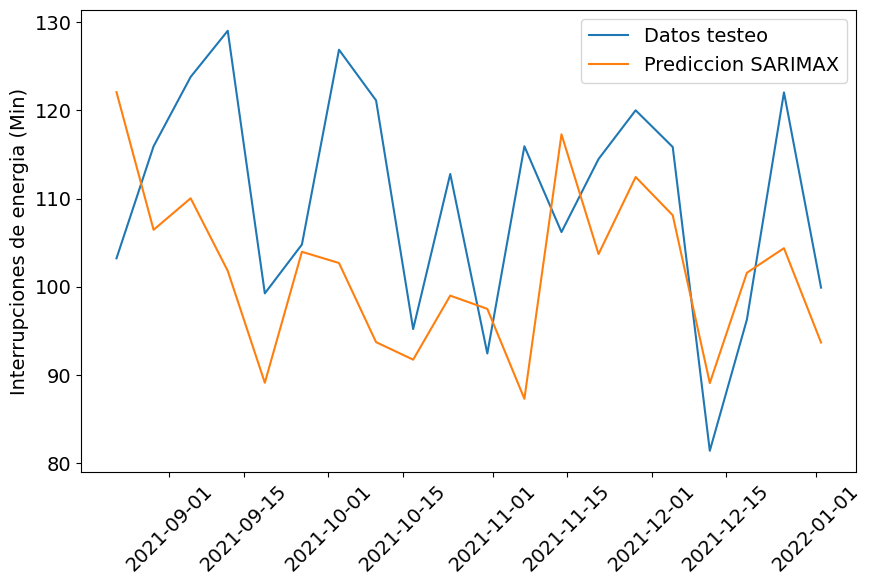

In [ ]:
plt.figure(figsize=(10, 6))
# Graficar los datos
#plt.plot(train.index,train,label = 'Datos entrenamiento')
plt.plot(test1.index,test1['INTER_NO_PROG_NO_EXCLU_MIN'],label = 'Datos testeo')
plt.plot(prediccion_test.index,prediccion_test, label='Prediccion SARIMAX')
plt.ylabel('Interrupciones de energia (Min)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**LSTM**

Las redes neuronales de tipo LSTM (Long Short-Term Memory) son especialmente útiles para modelar y predecir series de tiempo secuenciales o con dependencias de largo plazo. Se aplican en situaciones en las que se necesita capturar patrones complejos y dependencias a largo plazo en los datos de series de tiempo.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Normalizar los datos
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(datos3)
# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data_normalized[:555]
test_data = data_normalized[-21:]

In [ ]:
#Preparar los datos de entrenamiento y prueba en secuencias para LSTM
def create_sequences(data, n_steps):
    X = [data[i:i+n_steps] for i in range(len(data) - n_steps)]
    y = [data[i+n_steps] for i in range(len(data) - n_steps)]
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

n_steps =1 # Número de pasos de tiempo para cada secuencia
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)

 Construcción y compilación de un modelo de redes neuronales recurrentes (RNN) utilizando la arquitectura LSTM (Long Short-Term Memory)

 Se agrega una capa LSTM al modelo. Esta capa tiene 64 unidades (neuronas)

 Se agrega una capa densa (totalmente conectada) al modelo. Esta capa tiene una sola unidad de salida.

 Se compila el modelo especificando el optimizador y la función de pérdida. En este caso, se utiliza el optimizador 'adam', que es un algoritmo de optimización popular para entrenar redes neuronales. La función de pérdida se establece en 'mse' (mean squared error), que es una métrica comúnmente utilizada para problemas de regresión.

In [ ]:
#Construir el modelo LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
18/18 [==============================] - 2s 4ms/step - loss: 0.2073
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.1592
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.1199
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0860
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0583
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0387
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 9/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 10/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 11/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 12/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 13/50
18/18 [==============================

In [ ]:
y_pred = model.predict(X_test)
y_pred1 = scaler.inverse_transform(y_pred)

1/1 [==============================] - 0s 216ms/step


In [ ]:
pred_lstm = pd.DataFrame(y_pred1)
column_names = ['LSTM']  # Reemplaza nombres de columnas
pred_lstm.columns = column_names
pred_lstm.index=test.index
pred_lstm

,LSTM
FECHA,
2021-08-22,107.033150
2021-08-29,107.522835
2021-09-05,109.244209
2021-09-12,110.308739
2021-09-19,111.015594
2021-09-26,106.983177
2021-10-03,107.734787
2021-10-10,110.724724
2021-10-17,109.947800


In [ ]:
# Calcular los errores de pronóstico (MSE y RMSE)
test_lstm_mse = mean_squared_error(test1['INTER_NO_PROG_NO_EXCLU_MIN'], pred_lstm)
test_lstm_rmse = np.sqrt(test_lstm_mse)
# Calcular la media de los datos
data_mean = np.mean(datos3['INTER_NO_PROG_NO_EXCLU_MIN'])
print("MSE (prueba):", test_lstm_mse)
print("RMSE (prueba):", test_lstm_rmse)
print("Media de los datos:", data_mean)


MSE (prueba): 164.228726300578
RMSE (prueba): 12.815175625038385
Media de los datos: 109.14671482667211


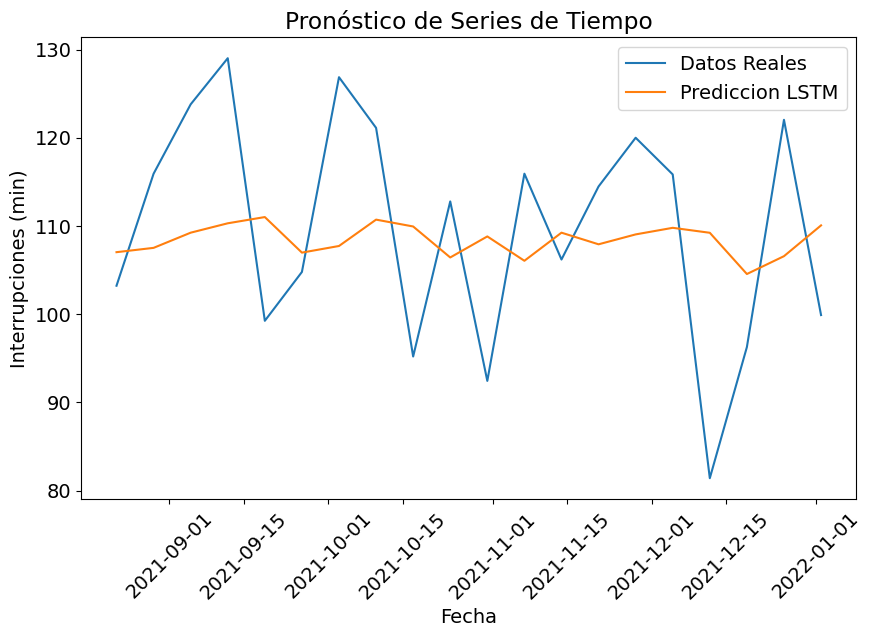

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test1.index,test1['INTER_NO_PROG_NO_EXCLU_MIN'], label='Datos Reales')
plt.plot(pred_lstm.index,pred_lstm['LSTM'], label='Prediccion LSTM')
plt.xlabel('Fecha')
plt.ylabel('Interrupciones (min)')
plt.title('Pronóstico de Series de Tiempo')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# PROPHET

Herramienta para el análisis y pronóstico de series de tiempo, especialmente aquellas con patrones estacionales y tendencias no lineales. Prophet es una biblioteca de código abierto desarrollada por Facebook que utiliza un enfoque aditivo para modelar las series de tiempo.

El objetivo principal de Prophet es permitir a los usuarios predecir valores futuros en series de tiempo, teniendo en cuenta tanto las tendencias a largo plazo como los patrones estacionales. Utiliza un modelo de descomposición aditiva para separar la serie de tiempo en sus componentes principales: tendencia, estacionalidad y efectos de vacaciones.


In [ ]:
pip install Prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric


In [ ]:
#CARGAMOS DATOS
import pandas as pd
df_fb = pd.read_excel('https://docs.google.com/uc?id=1yyLvPCj27heHLPIxRptePE9jLFh26D1H')
df_fb['FECHA'] = pd.to_datetime(df_fb['FECHA'])
df_fb

,FECHA,INTER_NO_PROG_NO_EXCLU_MIN
0,2011-01-02,136.680000
1,2011-01-09,118.127273
2,2011-01-16,101.616667
3,2011-01-23,132.885714
4,2011-01-30,115.800000
...,...,...
570,2021-12-05,115.850000
571,2021-12-12,81.400000
572,2021-12-19,96.273333
573,2021-12-26,122.046154


In [ ]:
df_fb= df_fb.rename(columns={"FECHA":"ds","INTER_NO_PROG_NO_EXCLU_MIN":"y"})
df_fb

,ds,y
0,2011-01-02,136.680000
1,2011-01-09,118.127273
2,2011-01-16,101.616667
3,2011-01-23,132.885714
4,2011-01-30,115.800000
...,...,...
570,2021-12-05,115.850000
571,2021-12-12,81.400000
572,2021-12-19,96.273333
573,2021-12-26,122.046154


In [ ]:
train_fb =df_fb[:555]
test_fb=df_fb[-20:]


In [ ]:
m=Prophet(changepoint_prior_scale=0.5,yearly_seasonality=True,
   weekly_seasonality=True,seasonality_mode='multiplicative').add_country_holidays(country_name='COL')

m.fit(train_fb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56rc_v05/wdygawwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56rc_v05/ijr4gmnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66207', 'data', 'file=/tmp/tmp56rc_v05/wdygawwn.json', 'init=/tmp/tmp56rc_v05/ijr4gmnh.json', 'output', 'file=/tmp/tmp56rc_v05/prophet_model5p045zw5/prophet_model-20230628130400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Si los cambios de tendencia están sobreajustados (demasiada flexibilidad) o no ajustados (falta de flexibilidad), puede ajustar la fuerza de la dispersión antes de usar el argumento de entrada changepoint_prior_scale. De forma predeterminada, este parámetro se establece en 0,05. Aumentarlo hará que la tendencia sea más flexible

In [ ]:
future=m.make_future_dataframe(periods=len(test_fb),freq='W')
prophet_pred=m.predict(future)
# Obtener las predicciones para el conjunto de prueba
prediccion_p = prophet_pred[-20:][['ds','yhat']]
prediccion_p

,ds,yhat
555,2021-08-22,105.660572
556,2021-08-29,107.532176
557,2021-09-05,108.840148
558,2021-09-12,109.269408
559,2021-09-19,110.151025
560,2021-09-26,112.798677
561,2021-10-03,116.230893
562,2021-10-10,117.346592
563,2021-10-17,114.113150
564,2021-10-24,108.390888


In [ ]:
prophet_p=pd.DataFrame(prediccion_p)
prophet_p= prophet_p.rename(columns={"ds":"FECHA","yhat":"PROPHET"})
prophet_p= prophet_p.set_index('FECHA')
prophet_p


,PROPHET
FECHA,
2021-08-22,105.660572
2021-08-29,107.532176
2021-09-05,108.840148
2021-09-12,109.269408
2021-09-19,110.151025
2021-09-26,112.798677
2021-10-03,116.230893
2021-10-10,117.346592
2021-10-17,114.113150


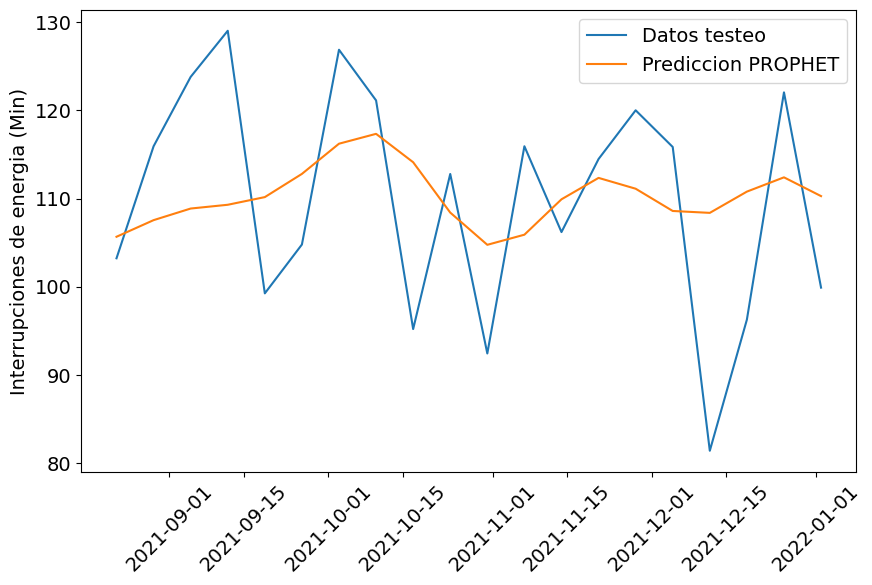

In [ ]:
plt.figure(figsize=(10, 6))
# Graficar los datos
plt.plot(test1.index,test1['INTER_NO_PROG_NO_EXCLU_MIN'],label = 'Datos testeo')
plt.plot(prophet_p.index,prophet_p['PROPHET'], label='Prediccion PROPHET')
plt.ylabel('Interrupciones de energia (Min)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calcular los errores de pronóstico (MSE y RMSE)
p_mse = mean_squared_error(test1['INTER_NO_PROG_NO_EXCLU_MIN'], prophet_p)
p_rmse = np.sqrt(p_mse)
# Calcular la media de los datos
data_mean = np.mean(datos3['INTER_NO_PROG_NO_EXCLU_MIN'])
print("MSE (prueba):", p_mse)
print("RMSE (prueba):", p_rmse)
print("Media de los datos:", data_mean)

MSE (prueba): 145.9368136624583
RMSE (prueba): 12.080431021385714
Media de los datos: 109.14671482667211


In [ ]:
#COMPARACION DE MODELOS
modelos= pd.concat([test1['INTER_NO_PROG_NO_EXCLU_MIN'],prediccion_test,pred_lstm,prophet_p['PROPHET']], axis=1)
modelos

,INTER_NO_PROG_NO_EXCLU_MIN,SARIMAX,LSTM,PROPHET
FECHA,,,,
2021-08-22,103.227273,122.066919,107.033150,105.669241
2021-08-29,115.930769,106.458853,107.522835,107.553312
2021-09-05,123.800000,110.032898,109.244209,108.869919
2021-09-12,129.030769,101.798834,110.308739,109.297367
2021-09-19,99.250000,89.112623,111.015594,110.166599
2021-09-26,104.790000,103.965148,106.983177,112.798735
2021-10-03,126.877778,102.691624,107.734787,116.222218
2021-10-10,121.130769,93.716736,110.724724,117.341231
2021-10-17,95.200000,91.730637,109.947800,114.120415


In [ ]:
# Crear diccionario con los datos de cada modelo
data = {
    'Modelo': ['SARIMAX', 'LSTM', 'PROPHET'],
    'MSE': [test_mse, test_lstm_mse, p_mse],
    'RMSE': [test_rmse, test_lstm_rmse, p_rmse],
    }

# Crear DataFrame
df = pd.DataFrame(data)
df

,Modelo,MSE,RMSE
0,SARIMAX,232.923487,15.261831
1,LSTM,164.228726,12.815176
2,PROPHET,145.931021,12.080191


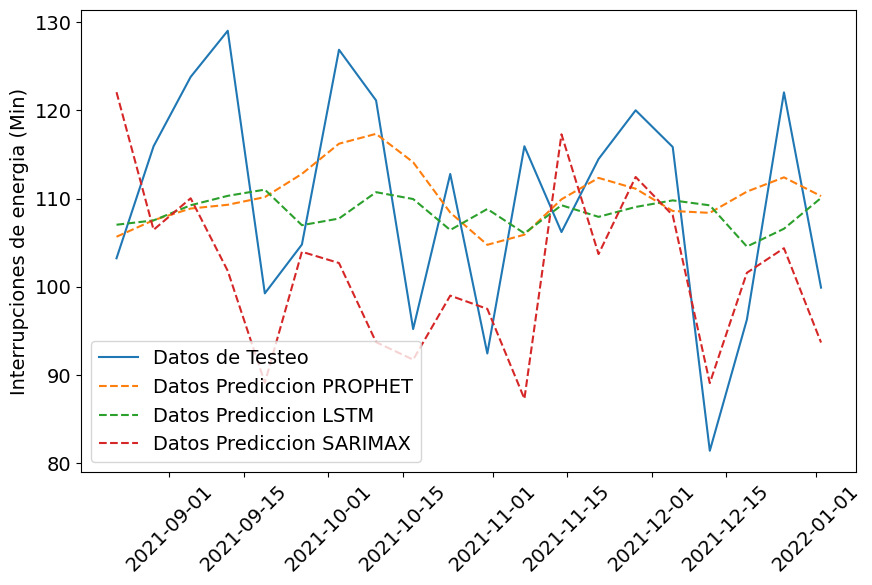

In [ ]:
plt.figure(figsize=(10, 6))
# Graficar resultados
plt.plot(test1.index,test['INTER_NO_PROG_NO_EXCLU_MIN'],label = 'Datos de Testeo')
plt.plot(prophet_p.index,prophet_p, label='Datos Prediccion PROPHET',linestyle='--')
plt.plot(pred_lstm.index,pred_lstm, label='Datos Prediccion LSTM',linestyle='--')
plt.plot(prediccion_test.index,prediccion_test, label='Datos Prediccion SARIMAX',linestyle='--')
plt.plot()
plt.ylabel('Interrupciones de energia (Min)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **SE GENERA PRONOSTICO DE 80 SEMANAS PARTIENDO DESDE LA ULTIMA FECHA DEL ARCHIVO CARGADO HASTA JULIO DEL 2023**

In [ ]:
ultima_semana = df_fb['ds'].max()
ultima_semana

Timestamp('2022-01-02 00:00:00')

In [ ]:
fechas_pronostico = pd.date_range(start=ultima_semana, periods=80, freq='W')
pronostico_df = pd.DataFrame({'ds': fechas_pronostico})
pronostico_df['ds'] = pd.to_datetime(pronostico_df['ds'])
pronostico_df

,ds
0,2022-01-02
1,2022-01-09
2,2022-01-16
3,2022-01-23
4,2022-01-30
...,...
75,2023-06-11
76,2023-06-18
77,2023-06-25
78,2023-07-02


In [ ]:
#PREDICCION PROPHET
p_2023 = m.predict(pronostico_df)
print(p_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds        yhat  yhat_lower  yhat_upper
0  2022-01-02  110.256994   83.088367  140.038039
1  2022-01-09  105.627925   75.761442  135.814647
2  2022-01-16  102.716316   72.186213  133.004779
3  2022-01-23  104.032707   76.577005  133.658084
4  2022-01-30  107.821087   80.157068  137.008972
..        ...         ...         ...         ...
75 2023-06-11  106.317422   78.311260  134.199764
76 2023-06-18  105.316435   76.794410  134.944281
77 2023-06-25  108.534236   80.133063  136.537830
78 2023-07-02  113.392754   83.432989  141.070519
79 2023-07-09  116.368645   87.467636  144.697874

[80 rows x 4 columns]


In [ ]:
#Para hacer una estimación de la precisión de nuestras predicciones podemos usar un procedimiento de validación cruzada incorporado en Prophet,
#en el que se hacen predicciones a cierto horizonte (por ejemplo 365 días) cada cierto intervalo (por ejemplo 180 días) trascurrido cierto periodo de tiempo (por ejemplo 400 días).
# Realizar la validación cruzada
df_cv = cross_validation(m, initial='400 days', period='180 days', horizon='365 days')
# Calcular métricas de rendimiento
df_metrics = performance_metrics(df_cv)
print(df_metrics)

INFO:prophet:Making 18 forecasts with cutoffs between 2012-03-30 00:00:00 and 2020-08-15 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp56rc_v05/dn7xzxdx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56rc_v05/rp5du3_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80420', 'data', 'file=/tmp/tmp56rc_v05/dn7xzxdx.json', 'init=/tmp/tmp56rc_v05/rp5du3_z.json', 'output', 'file=/tmp/tmp56rc_v05/prophet_modelibbghaoq/prophet_model-20230628130501.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56rc_v05/z_qmvlho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56rc_v05/_k9b3s7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

     horizon         mse       rmse        mae      mape     mdape     smape  \
0    36 days  617.042615  24.840342  20.448204  0.204843  0.170122  0.192258   
1    37 days  630.002509  25.099851  20.779029  0.207562  0.171255  0.195178   
2    38 days  621.508510  24.930072  20.682212  0.204413  0.171255  0.193433   
3    39 days  651.580191  25.526069  21.013323  0.205614  0.184165  0.195905   
4    40 days  649.617296  25.487591  20.980553  0.205204  0.187241  0.195571   
..       ...         ...        ...        ...       ...       ...       ...   
325 361 days  572.482292  23.926602  19.205649  0.201568  0.146522  0.180878   
326 362 days  567.630869  23.825005  19.142355  0.201220  0.146522  0.180428   
327 363 days  563.692863  23.742217  19.047475  0.200693  0.146522  0.179531   
328 364 days  552.718278  23.509961  18.839104  0.200432  0.144249  0.178343   
329 365 days  538.526349  23.206170  18.444452  0.197561  0.136471  0.175225   

     coverage  
0    0.763441  
1    0.

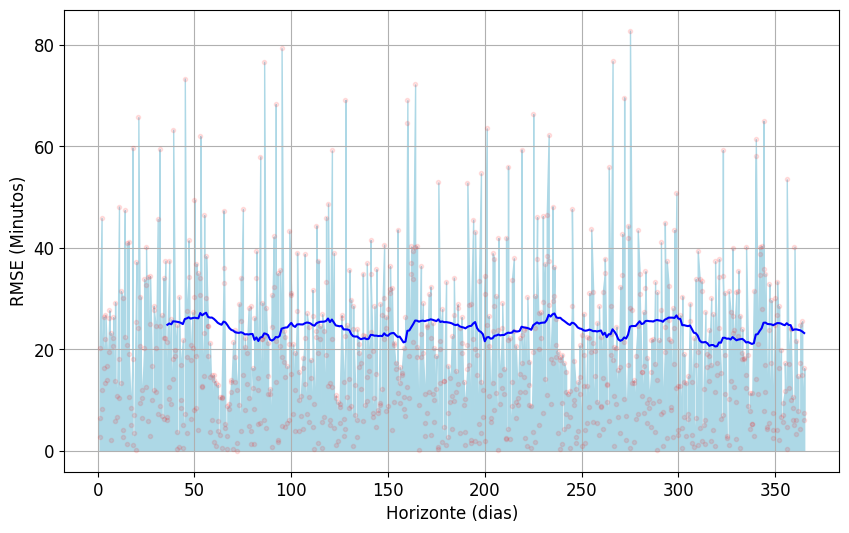

In [ ]:
fig5=plot_cross_validation_metric(df_cv, metric='rmse')
axes = fig5.get_axes()
# Modificar los nombres de los ejes
axes[0].set_xlabel('Horizonte (dias)')
axes[0].set_ylabel('RMSE (Minutos)')
for ax in axes:
    ax.lines[0].set_color('red')  # Cambiar el color de la línea principal
    ax.fill_between(ax.lines[0].get_xdata(), ax.lines[0].get_ydata(), color='lightblue')  # Cambiar el color del área sombreada
    fig5.show()


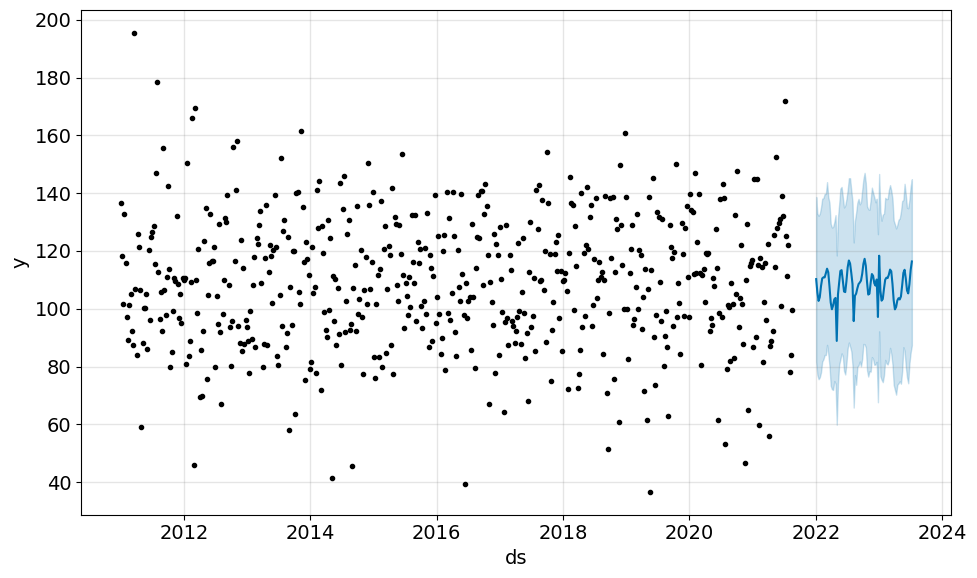

In [ ]:
# Visualizar la serie de tiempo original y las predicciones
fig1=m.plot(p_2023)

Text(54.597222222222214, 0.5, 'Interrupcion mensual')

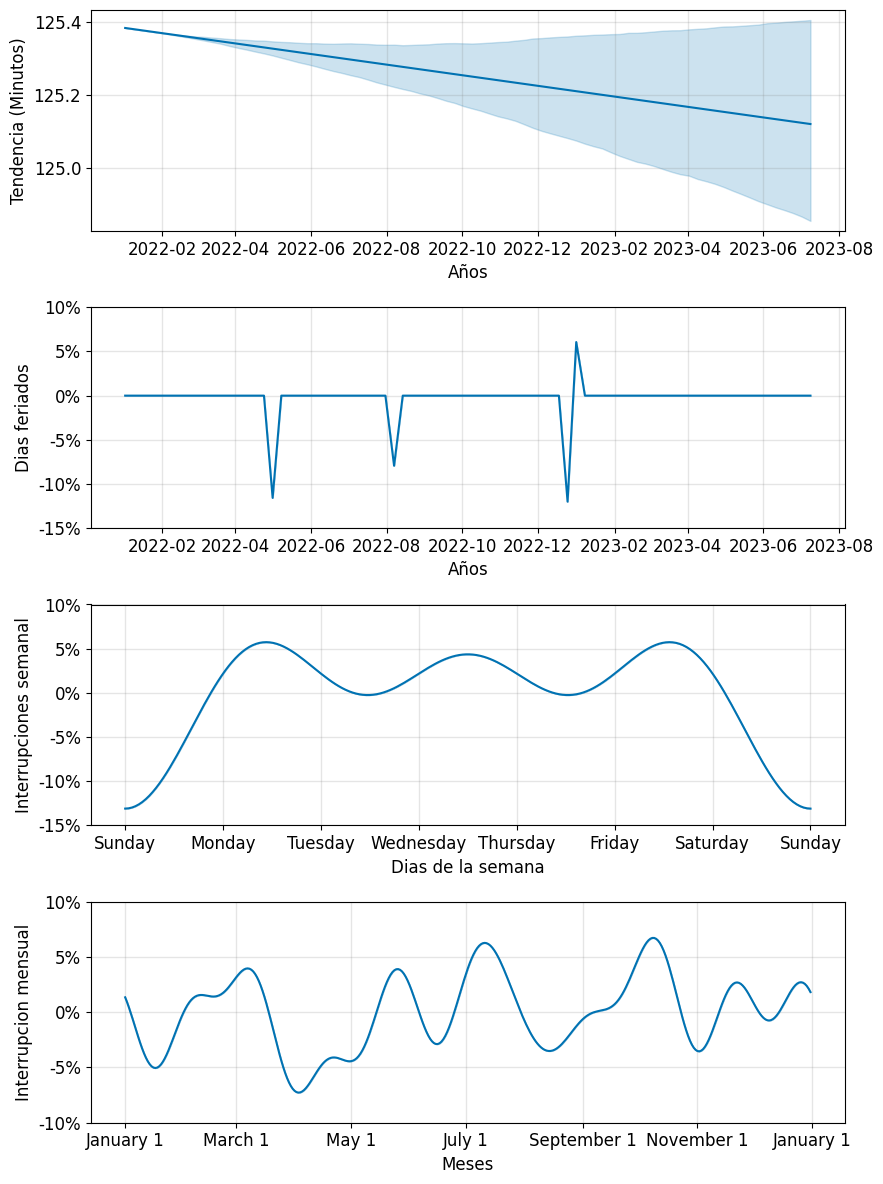

In [ ]:
# Descomponer y visualizar las tendencias, estacionalidades y componentes
fig2=m.plot_components(p_2023)
axes = fig2.get_axes()
# Modificar los nombres de los ejes
axes[0].set_xlabel('Años')
axes[0].set_ylabel('Tendencia (Minutos)')

axes[1].set_xlabel('Años')
axes[1].set_ylabel('Dias feriados')

axes[2].set_xlabel('Dias de la semana')
axes[2].set_ylabel('Interrupciones semanal')

axes[3].set_xlabel('Meses')
axes[3].set_ylabel('Interrupcion mensual')

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, p_2023)